In [1]:
from skgarden import MondrianForestClassifier
from sklearn import datasets, cross_validation
import numpy as np
import pandas as pd


C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv('./input/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset=dataset.fillna(method='ffill')
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [3]:
training_set=dataset[:'2016'].iloc[:,0:1].values  
test_set=dataset['2017':].iloc[:,0:1].values

In [39]:
training_set

array([[ 82.45],
       [ 82.2 ],
       [ 81.4 ],
       ...,
       [167.29],
       [166.02],
       [166.44]])

In [6]:
datalen=len(dataset[:'2016'])
datalen

2769

In [40]:
training_set

array([[ 82.45],
       [ 82.2 ],
       [ 81.4 ],
       ...,
       [167.29],
       [166.02],
       [166.44]])

In [32]:
X_train=[]
y_train=[]
for i in range(0,datalen-1):
    X_train.append(training_set[i,0])
    y_train.append(training_set[i+1,0])

In [22]:
testlen=len(test_set)
X_test=[]
y_test=[]
for i in range(0,testlen-1):
    X_test.append(test_set[i,0])
    y_test.append(test_set[i+1,0])

In [33]:
#list -> ndim array로 변환
X_train=np.reshape(X_train,(-1,1))
y_train=np.reshape(y_train,(-1,1))
X_test=np.reshape(X_test,(-1,1))
y_test=np.reshape(y_test,(-1,1))

In [37]:
from skgarden import MondrianForestRegressor
mtr=MondrianForestRegressor(random_state=1,max_depth=5)
mtr.partial_fit(X_train,y_train)
y_pred,y_std=mtr.predict(X_test,return_std=True)

C:\Users\inha\Anaconda3\envs\tensorflow35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


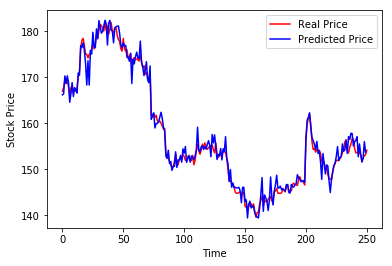

In [38]:
plt.plot(test_set,color='red',label='Real Price')
plt.plot(y_pred,color='blue',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

array([[ 82.45],
       [ 82.2 ],
       [ 81.4 ],
       ...,
       [166.98],
       [167.29],
       [166.02]])